# __Neural Networks__

+ It is a kind of a graph of neurons connected in layers every neuron in a layer is connected to all neuron in the previous and next layer.
+ We train the model with a set of input and actual out put by which the model rectify its mapping and make it more accurate.

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Loading an looking the data

In [10]:
data=keras.datasets.fashion_mnist
data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\ariha\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

_Divide the data into two part to train and test_

In [11]:
(train_images,train_labels),(test_images,test_labels)=data.load_data()

_The label contains no from 0 to 9 for each element in the list Class_Names_

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels[0] 

9

it is a  Ankle boot


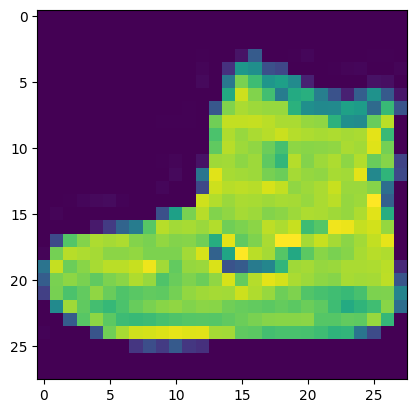

In [13]:
plt.imshow(train_images[0]);
print("it is a ",class_names[train_labels[0]])

_Each image in train and test data are of 8 bit so we will divide it by 255 to compress them_

In [14]:
train_images,test_images=train_images/255.0,test_images/255.0

### Model


_We can not give the data in the form of 2D array at the input layer we have to convert the 2D 28x28 array into 784x1 1D array_
+ Input layer will have 784 neurons
+ Output layer will have 10 neurons(1 for each table element)
+ There are also hidden layer which are present B/W I/O layer

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#this will give the input in 1D array 
    keras.layers.Dense(128,activation="relu"), #this is the activation function rectiified linear unit
    keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [1]:
# Sigmoid function (makes value B/W 0 to 1)
# rectified linear unit (makes value B/W 0 to infinite)
# loss function (To check the adjust ments to the input)

_training the model_

In [21]:
model.fit(train_images,train_labels,epochs=5) #epochs: the no. of time the model will see the information

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3318 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3094 - accuracy: 0.8868
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2929 - accuracy: 0.8916
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2765 - accuracy: 0.8978
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2660 - accuracy: 0.9002


_The accuracy of our model_

In [24]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8737


### Let's use the model for predictions

In [31]:
prediction=model.predict(test_images) #only take list as the input

313/313 [==============================] - 1s 2ms/step


_prediction will be a array of the array of how much it matches to each of the given output labels_

In [26]:
class_names[np.argmax(prediction[0])]

'Ankle boot'

_This is not very clear with this so lets compare with the input picture the actual and the predicted out put_

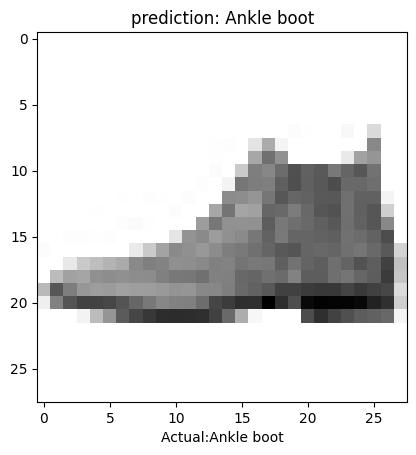

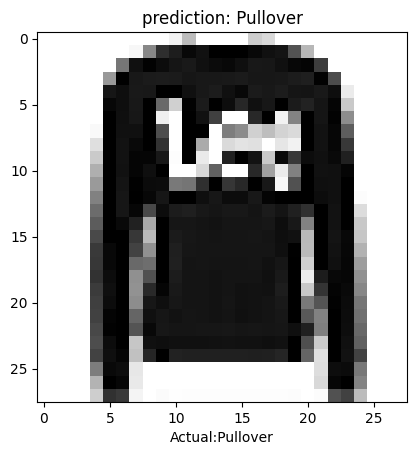

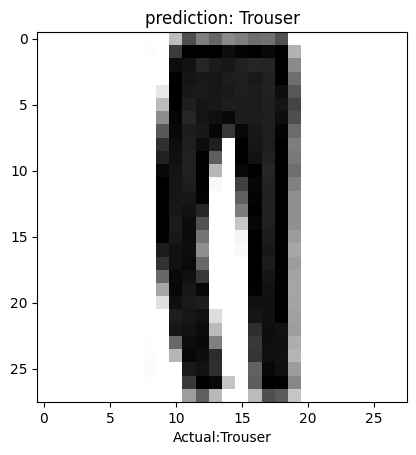

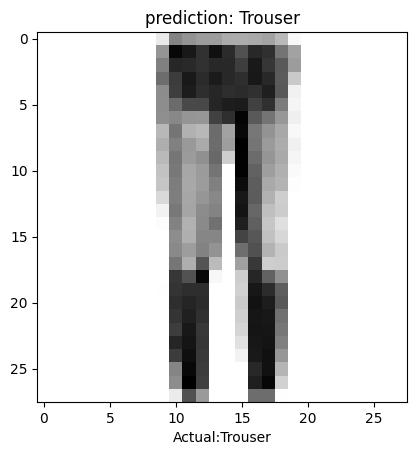

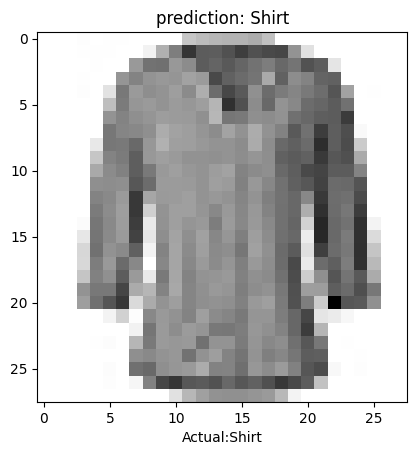

In [32]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("Actual:"+class_names[test_labels[i]])
    plt.title("prediction: "+class_names[np.argmax(prediction[i])])
    plt.show()